<a href="https://colab.research.google.com/github/anvy87/AlgoTrading/blob/master/stock_return_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching stock data...
Period: 2024-10-29 to 2025-10-29

Downloaded data for Reliance (RELIANCE.NS). Columns: [('Adj Close', 'RELIANCE.NS'), ('Close', 'RELIANCE.NS'), ('High', 'RELIANCE.NS'), ('Low', 'RELIANCE.NS'), ('Open', 'RELIANCE.NS'), ('Volume', 'RELIANCE.NS')]
✓ Added 'Adj Close' for Reliance
Downloaded data for TCS (TCS.NS). Columns: [('Adj Close', 'TCS.NS'), ('Close', 'TCS.NS'), ('High', 'TCS.NS'), ('Low', 'TCS.NS'), ('Open', 'TCS.NS'), ('Volume', 'TCS.NS')]
✓ Added 'Adj Close' for TCS
Downloaded data for HDFC Bank (HDFCBANK.NS). Columns: [('Adj Close', 'HDFCBANK.NS'), ('Close', 'HDFCBANK.NS'), ('High', 'HDFCBANK.NS'), ('Low', 'HDFCBANK.NS'), ('Open', 'HDFCBANK.NS'), ('Volume', 'HDFCBANK.NS')]
✓ Added 'Adj Close' for HDFC Bank
Downloaded data for Infosys (INFY.NS). Columns: [('Adj Close', 'INFY.NS'), ('Close', 'INFY.NS'), ('High', 'INFY.NS'), ('Low', 'INFY.NS'), ('Open', 'INFY.NS'), ('Volume', 'INFY.NS')]
✓ Added 'Adj Close' for Infosys
Downloaded data for ICICI Bank (ICICIBAN

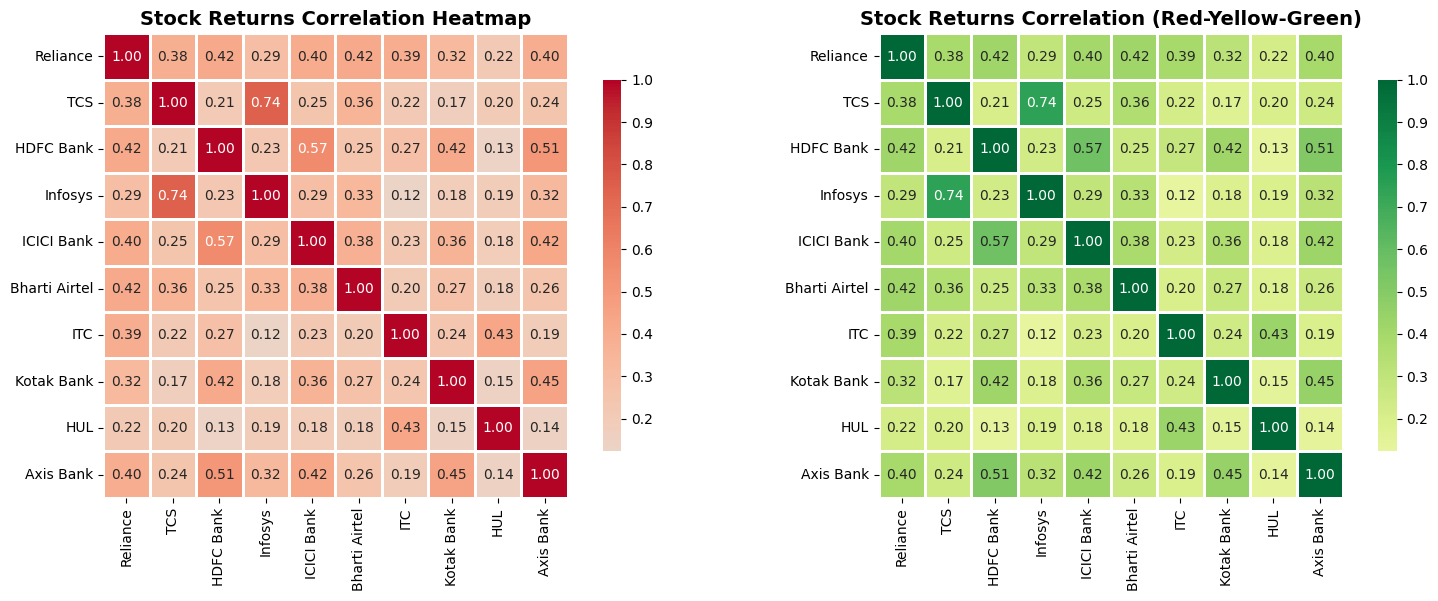


RISK-RETURN SUMMARY
               Annual Return (%)  Annual Volatility (%)  Sharpe Ratio
Bharti Airtel              27.99                  21.02          1.33
Kotak Bank                 23.71                  23.17          1.02
HDFC Bank                  16.64                  16.73          0.99
Reliance                   13.15                  20.71          0.63
Axis Bank                   7.40                  21.62          0.34
ICICI Bank                  4.55                  16.78          0.27
HUL                         1.97                  18.84          0.10
ITC                       -10.81                  17.49         -0.62
Infosys                   -14.55                  25.64         -0.57
TCS                       -23.57                  21.21         -1.11


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Define Indian stocks (NSE symbols need .NS suffix for Yahoo Finance)
indian_stocks = {
    'Reliance': 'RELIANCE.NS',
    'TCS': 'TCS.NS',
    'HDFC Bank': 'HDFCBANK.NS',
    'Infosys': 'INFY.NS',
    'ICICI Bank': 'ICICIBANK.NS',
    'Bharti Airtel': 'BHARTIARTL.NS',
    'ITC': 'ITC.NS',
    'Kotak Bank': 'KOTAKBANK.NS',
    'HUL': 'HINDUNILVR.NS',
    'Axis Bank': 'AXISBANK.NS'
}

# Set time period (last 1 year)
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

print("Fetching stock data...")
print(f"Period: {start_date.date()} to {end_date.date()}\n")

# Download stock data
stock_data = {}
for name, ticker in indian_stocks.items():
    try:
        # Explicitly set auto_adjust=False to get the 'Adj Close' column
        data = yf.download(ticker, start=start_date, end=end_date, progress=False, auto_adjust=False)
        if not data.empty:
            # Print columns to inspect
            print(f"Downloaded data for {name} ({ticker}). Columns: {data.columns.tolist()}")
            # Access 'Adj Close' using the multi-level index
            if ('Adj Close', ticker) in data.columns:
                stock_data[name] = data[('Adj Close', ticker)]
                print(f"✓ Added 'Adj Close' for {name}")
            elif 'Adj Close' in data.columns:
                 # Fallback for potential non-multiindex case
                stock_data[name] = data['Adj Close']
                print(f"✓ Added 'Adj Close' for {name}")
            else:
                print(f"✗ 'Adj Close' not found for {name}. Available columns: {data.columns.tolist()}")
        else:
            print(f"✗ No data for {name} ({ticker})")
    except Exception as e:
        print(f"✗ Error downloading {name}: {str(e)}")

# Create DataFrame with adjusted close prices
prices_df = pd.DataFrame(stock_data)

# Calculate daily returns (percentage change)
returns_df = prices_df.pct_change().dropna()

print(f"\nCalculated daily returns for {len(returns_df)} trading days")
print("\nBasic statistics of returns:")
print(returns_df.describe())

# Calculate correlation matrix
correlation_matrix = returns_df.corr()

print("\n" + "="*50)
print("CORRELATION MATRIX")
print("="*50)
print(correlation_matrix.round(3))

# Find highest and lowest correlations
corr_values = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_values.append({
            'Stock 1': correlation_matrix.columns[i],
            'Stock 2': correlation_matrix.columns[j],
            'Correlation': correlation_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_values).sort_values('Correlation', ascending=False)

print("\n" + "="*50)
print("TOP 5 MOST CORRELATED PAIRS")
print("="*50)
print(corr_df.head().to_string(index=False))

print("\n" + "="*50)
print("TOP 5 LEAST CORRELATED PAIRS")
print("="*50)
print(corr_df.tail().to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=axes[0])
axes[0].set_title('Stock Returns Correlation Heatmap', fontsize=14, fontweight='bold')

# Clustermap for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0,
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=axes[1])
axes[1].set_title('Stock Returns Correlation (Red-Yellow-Green)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('indian_stock_correlation.png', dpi=300, bbox_inches='tight')
print("\n✓ Correlation heatmap saved as 'indian_stock_correlation.png'")

plt.show()

# Calculate and display annualized returns and volatility
annual_returns = returns_df.mean() * 252  # 252 trading days
annual_volatility = returns_df.std() * np.sqrt(252)

summary_stats = pd.DataFrame({
    'Annual Return (%)': annual_returns * 100,
    'Annual Volatility (%)': annual_volatility * 100,
    'Sharpe Ratio': annual_returns / annual_volatility
}).sort_values('Annual Return (%)', ascending=False)

print("\n" + "="*50)
print("RISK-RETURN SUMMARY")
print("="*50)
print(summary_stats.round(2))

Plotting daily returns for the top 5 most correlated stock pairs:


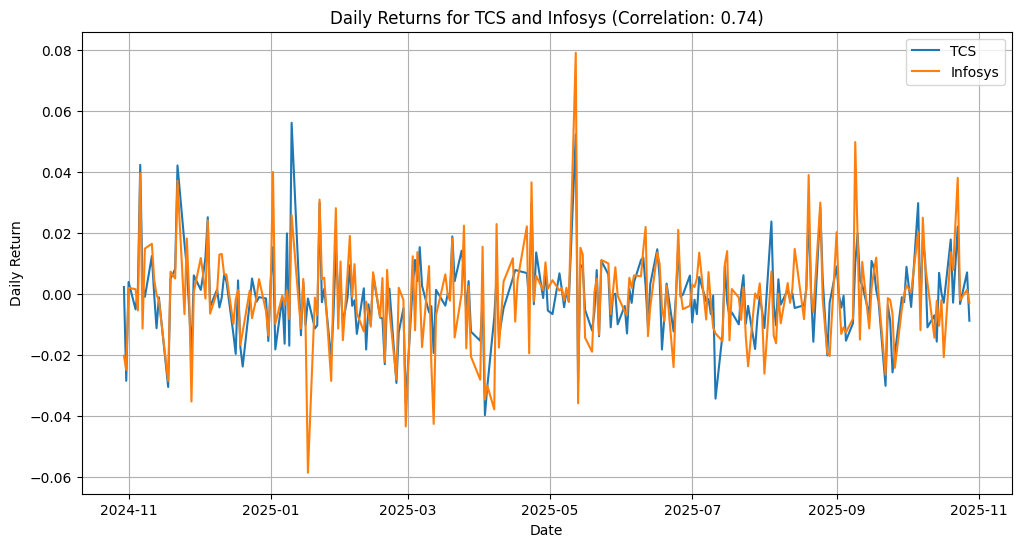

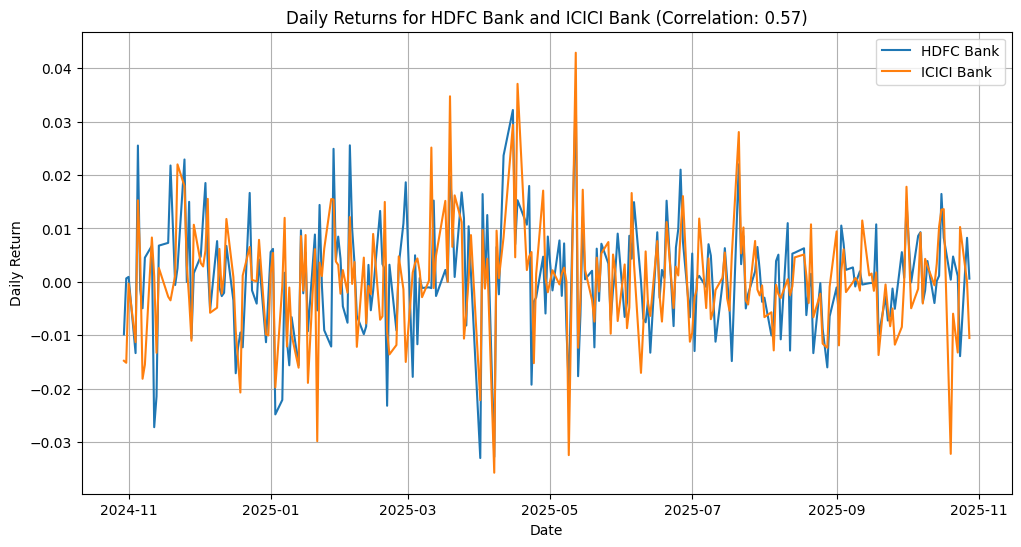

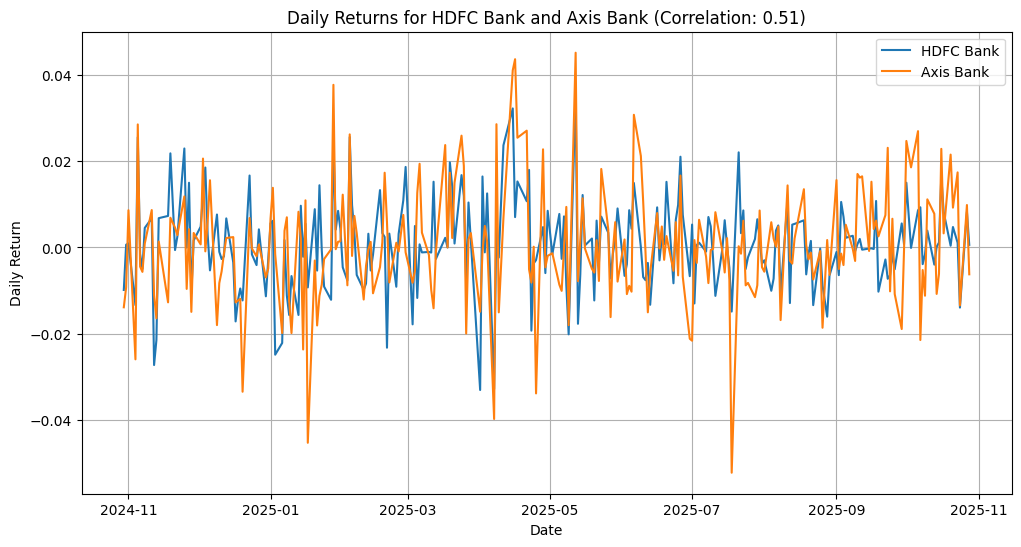

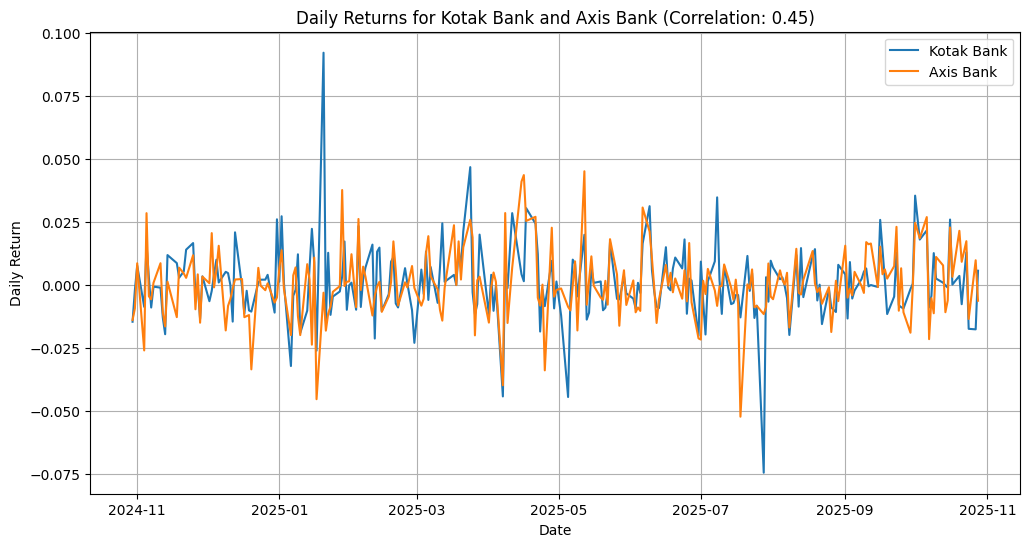

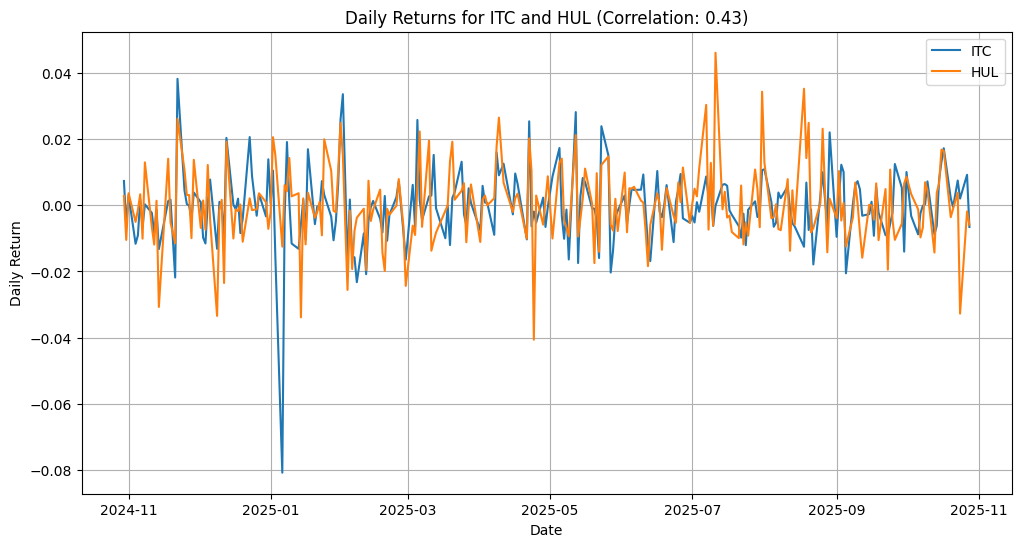

In [5]:
# Get the top 5 most correlated pairs from corr_df
top_5_correlated_pairs = corr_df.head(5)

print("Plotting daily returns for the top 5 most correlated stock pairs:")

# Plot daily returns for each of the top 5 pairs
for index, row in top_5_correlated_pairs.iterrows():
    stock1 = row['Stock 1']
    stock2 = row['Stock 2']
    correlation = row['Correlation']

    if stock1 in returns_df.columns and stock2 in returns_df.columns:
        plt.figure(figsize=(12, 6))
        plt.plot(returns_df.index, returns_df[stock1], label=stock1)
        plt.plot(returns_df.index, returns_df[stock2], label=stock2)
        plt.title(f'Daily Returns for {stock1} and {stock2} (Correlation: {correlation:.2f})')
        plt.xlabel('Date')
        plt.ylabel('Daily Return')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"Could not find daily return data for pair: {stock1} and {stock2}")